In [2]:
pip install google_play_scraper

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

In [6]:
# Define and configure Google Play Scraper library
users_reviews = reviews_all(
    'com.busuu.android.en',
    sleep_milliseconds=0,
    lang='en',
    country='us',
    sort=Sort.NEWEST, 
)

In [8]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,78da4439-5320-4b90-a67d-df1e24c3312c,Medine Esra Aslan,https://play-lh.googleusercontent.com/a/AGNmyx...,Harika bence ama tek sıkıntı qynı dersi 10 kez...,5,0,13.2.0.463origin/split-app-force-update-final,2022-09-04 14:42:44,None,NaT
1,7b226acc-86d8-46b7-9830-b4430e1d987e,RAM KRISHNAN,https://play-lh.googleusercontent.com/a-/ACB-R...,Kindly launch a busuu app separately for IELTS.,5,0,24.1.0.460,2022-08-08 09:25:52,None,NaT
2,7859d0b8-0bcf-46f6-8f15-ba0043ee66dc,Vasif Vəlizade,https://play-lh.googleusercontent.com/a/AGNmyx...,Çok iyi amma a2 geldim 5 çı dersten geçemiyoru...,5,0,24.1.0.460,2022-08-06 00:30:00,None,NaT
3,17c1a653-8ac0-4963-8b67-9d6522873384,Hande Vatansever,https://play-lh.googleusercontent.com/a/AGNmyx...,Premiumlar için olan sınavda kaldım onu bitirm...,1,6,24.1.0.460,2022-08-02 15:19:52,"Merhaba Hande,\n\nYaşadığınız mağduriyet için ...",2022-08-02 15:10:55
4,1053f711-9a8b-43af-bfd5-b86319eb691e,valdomiro andrade,https://play-lh.googleusercontent.com/a/AGNmyx...,"Muito lento pra abrir, mesmo na versão paga.",1,0,24.1.0.460,2022-07-26 18:38:20,None,NaT


In [9]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              634 non-null    object        
 1   userName              634 non-null    object        
 2   userImage             634 non-null    object        
 3   content               633 non-null    object        
 4   score                 634 non-null    int64         
 5   thumbsUpCount         634 non-null    int64         
 6   reviewCreatedVersion  463 non-null    object        
 7   at                    634 non-null    datetime64[ns]
 8   replyContent          250 non-null    object        
 9   repliedAt             250 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 49.7+ KB


In [10]:
# Count number of review scores
df_reviews['score'].value_counts()

5    425
4     97
1     58
3     39
2     15
Name: score, dtype: int64

<Axes: ylabel='score'>

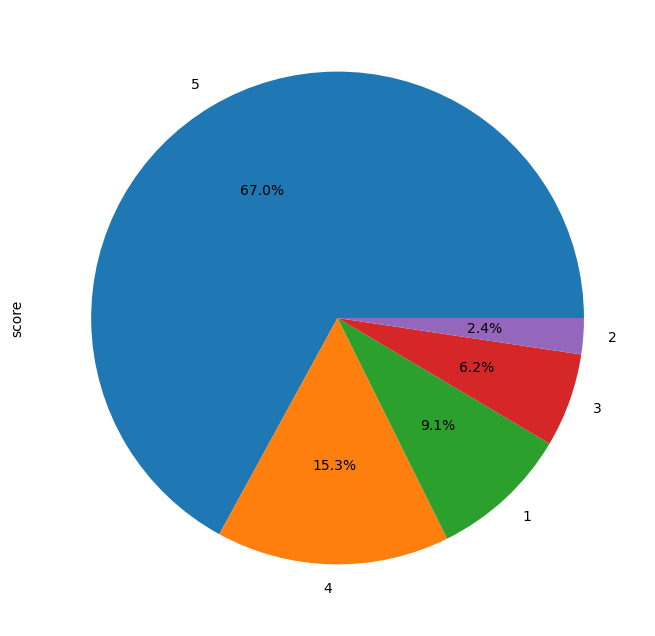

In [11]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [12]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [13]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,Harika bence ama tek sıkıntı qynı dersi 10 kez...,5
1,Kindly launch a busuu app separately for IELTS.,5
2,Çok iyi amma a2 geldim 5 çı dersten geçemiyoru...,5
3,Premiumlar için olan sınavda kaldım onu bitirm...,1
4,"Muito lento pra abrir, mesmo na versão paga.",1


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
# # Convert collected reviews data into dataframe
# df_reviews = pd.DataFrame(reviews)

# Label reviews as positive or negative based on rating
df_reviews['label'] = np.where(df_reviews['score'].isin([1,2]), 'negative', 'positive')

# Apply tokenization and stemming to review text
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
df_reviews['content'].dropna(inplace=True)
# convert the column to string
df_reviews['content'] = df_reviews['content'].astype(str)
df_reviews['tokens'] = df_reviews['content'].apply(lambda x: [stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words])

# Split data into training and testing sets
X = df_reviews['tokens']
y = df_reviews['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create bag-of-words representation for training data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train.apply(lambda x: ' '.join(x)))

# Train an NBC classifier on the training data
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)

# Evaluate performance on the testing data
X_test_bow = cv.transform(X_test.apply(lambda x: ' '.join(x)))
y_pred = nb.predict(X_test_bow)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[  3  11]
 [  1 112]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.21      0.33        14
    positive       0.91      0.99      0.95       113

    accuracy                           0.91       127
   macro avg       0.83      0.60      0.64       127
weighted avg       0.89      0.91      0.88       127



Extra